In [85]:
import json, urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from datetime import datetime
from datetime import timedelta
from matplotlib import colors

url = "https://raw.githubusercontent.com/mledoze/countries/master/countries.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

listaReg=[]
for item in data:
    if item['subregion'] not in listaReg:
        listaReg.append(item['subregion'])
listaReg

['Caribbean',
 'Southern Asia',
 'Middle Africa',
 'Northern Europe',
 'Southern Europe',
 'Western Asia',
 'South America',
 'Polynesia',
 '',
 'Australia and New Zealand',
 'Western Europe',
 'Eastern Africa',
 'Western Africa',
 'Eastern Europe',
 'Central America',
 'North America',
 'South-Eastern Asia',
 'Southern Africa',
 'Eastern Asia',
 'Northern Africa',
 'Melanesia',
 'Micronesia',
 'Central Asia',
 'Central Europe']

In [86]:

with open('/home/manu/Programacion/python/panda/coronavirus/subRexions.json') as file:
    subRexions = json.load(file)

for item in data:
    for subR in subRexions:
        nome=subR["nome"]
        if item["subregion"] in subR["lista"]:
            paisSub=nome
            break


### Función que devolve a columna de subrexions

In [87]:
def getSubRegion(listaPais):
    
    listaSubRegion=[]
    url = "https://raw.githubusercontent.com/mledoze/countries/master/countries.json"
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    with open('/home/manu/Programacion/python/panda/coronavirus/subRexions.json') as file:
            subRexions = json.load(file)
    
    for nomePais in listaPais: 
        nomeRexion="Sen Asignar"
        for item in data:
            if item["name"]["common"]==nomePais:
                for subR in subRexions:
                    nome=subR["nome"]
                    if item["subregion"] in subR["lista"]:
                        nomeRexion=nome
                        break
                break
        listaSubRegion.append(nomeRexion)
    return listaSubRegion
getSubRegion(["Australia","Spain","Arusba"]) 

['Oceanía', 'Europa Occidental', 'Sen Asignar']

In [88]:
URL_CONTAXIOS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
contaxios=pd.read_csv(URL_CONTAXIOS,keep_default_na=False)
_,colHoxe=contaxios.shape
hoxe=contaxios.columns[colHoxe-1]
dataHoxe = datetime.strptime(hoxe, '%m/%d/%y')
dataOnte=dataHoxe-timedelta(1)
onte=dataOnte.strftime('%-m/%-d/%y')
contaxios=contaxios.groupby('Country/Region').sum().reset_index()
contaxios.rename(columns={'Country/Region':'País'},inplace=True)
nomePaises=list(contaxios['País'])
contaxios.drop(['Lat','Long'],1,inplace=True)
contaxios.reset_index()
contaxios["Rexión"]=getSubRegion(list(contaxios["País"]))
contaxios


,País,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,Rexión
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,Asia Oriental
1,Albania,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,Europa Occidental
2,Algeria,0,0,0,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,África
3,Andorra,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,Europa Occidental
4,Angola,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,África
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,464,464,464,472,473,481,485,487,489,Sen Asignar
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,África
185,Yemen,0,0,0,0,0,0,0,0,0,...,453,469,482,484,496,524,560,591,632,Asia Occidental
186,Zambia,0,0,0,0,0,0,0,0,0,...,1089,1089,1089,1089,1200,1200,1200,1200,1321,África


In [89]:
Indices=contaxios.loc[contaxios["Rexión"]=="Sen Asignar"].index
PaisesSenAsignar=list(contaxios.loc[contaxios["Rexión"]=="Sen Asignar"]["País"])
PaisesSenAsignar


['Burma',
 'Cabo Verde',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Diamond Princess',
 'Holy See',
 'Korea, South',
 'MS Zaandam',
 'Sao Tome and Principe',
 'Slovakia',
 'Taiwan*',
 'US',
 'West Bank and Gaza']

In [90]:
### Manualmente Rexións sen Asignar
RexionsSenAsignar=["Asia Oriental","África","África","África","África","Asia Oriental","Europa Occidental","Asia Oriental",
    "Sudamérica","África","Europa do Este","Asia Oriental","Norte América","Asia Occidental"]

for i in range(PaisesSenAsignar.__len__()):
    contaxios.loc[Indices[i],"Rexión"]=RexionsSenAsignar[i]


### Agrupamento por Rexións -> Creación de Ficheiro para Bar Chart Race

In [91]:
contaxiosRexion=contaxios.groupby('Rexión').sum().reset_index()
#Descargo isto para unha Bar Chart Race
#Reformateo as datas
for col in contaxiosRexion.columns:
    print(col)
    if col!="Rexión":
        dataAme=datetime.strptime(col, '%m/%d/%y')
        dataEu=dataAme.strftime('%d/%m/%y')
        contaxiosRexion.rename(columns={col:dataEu},inplace=True)

contaxiosRexion.to_csv('/tmp/contaxiosRexion.csv',index=True)


Rexión
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3/20
3/4/20
3/5/20
3/6/20
3/7/20
3/8/20
3/9/20
3/10/20
3/11/20
3/12/20
3/13/20
3/14/20
3/15/20
3/16/20
3/17/20
3/18/20
3/19/20
3/20/20
3/21/20
3/22/20
3/23/20
3/24/20
3/25/20
3/26/20
3/27/20
3/28/20
3/29/20
3/30/20
3/31/20
4/1/20
4/2/20
4/3/20
4/4/20
4/5/20
4/6/20
4/7/20
4/8/20
4/9/20
4/10/20
4/11/20
4/12/20
4/13/20
4/14/20
4/15/20
4/16/20
4/17/20
4/18/20
4/19/20
4/20/20
4/21/20
4/22/20
4/23/20
4/24/20
4/25/20
4/26/20
4/27/20
4/28/20
4/29/20
4/30/20
5/1/20
5/2/20
5/3/20
5/4/20
5/5/20
5/6/20
5/7/20
5/8/20
5/9/20
5/10/20
5/11/20
5/12/20
5/13/20
5/14/20
5/15/20
5/16/20
5/17/20
5/18/20
5/19/20
5/20/20
5/21/20
5/22/20
5/23/20
5/24/20
5/25/20
5/26/20
5/27/20
5/28/20
5/29/

In [92]:
listaRexions=list(contaxiosRexion["Rexión"])
contaxiosMelt=contaxiosRexion.melt(id_vars='Rexión',var_name='Día',value_name='Valor')
contaxiosMelt.loc[contaxiosMelt.index>311]

,Rexión,Día,Valor
312,Asia Occidental,01/03/20,168
313,Asia Oriental,01/03/20,85854
314,Europa Occidental,01/03/20,2194
315,Europa do Este,01/03/20,9
316,Norte América,01/03/20,60
...,...,...,...
1139,Europa do Este,12/06/20,675800
1140,Norte América,12/06/20,2359919
1141,Oceanía,12/06/20,8824
1142,Sudamérica,12/06/20,1346594


Text(0, 0.5, 'Número de Contaxios')

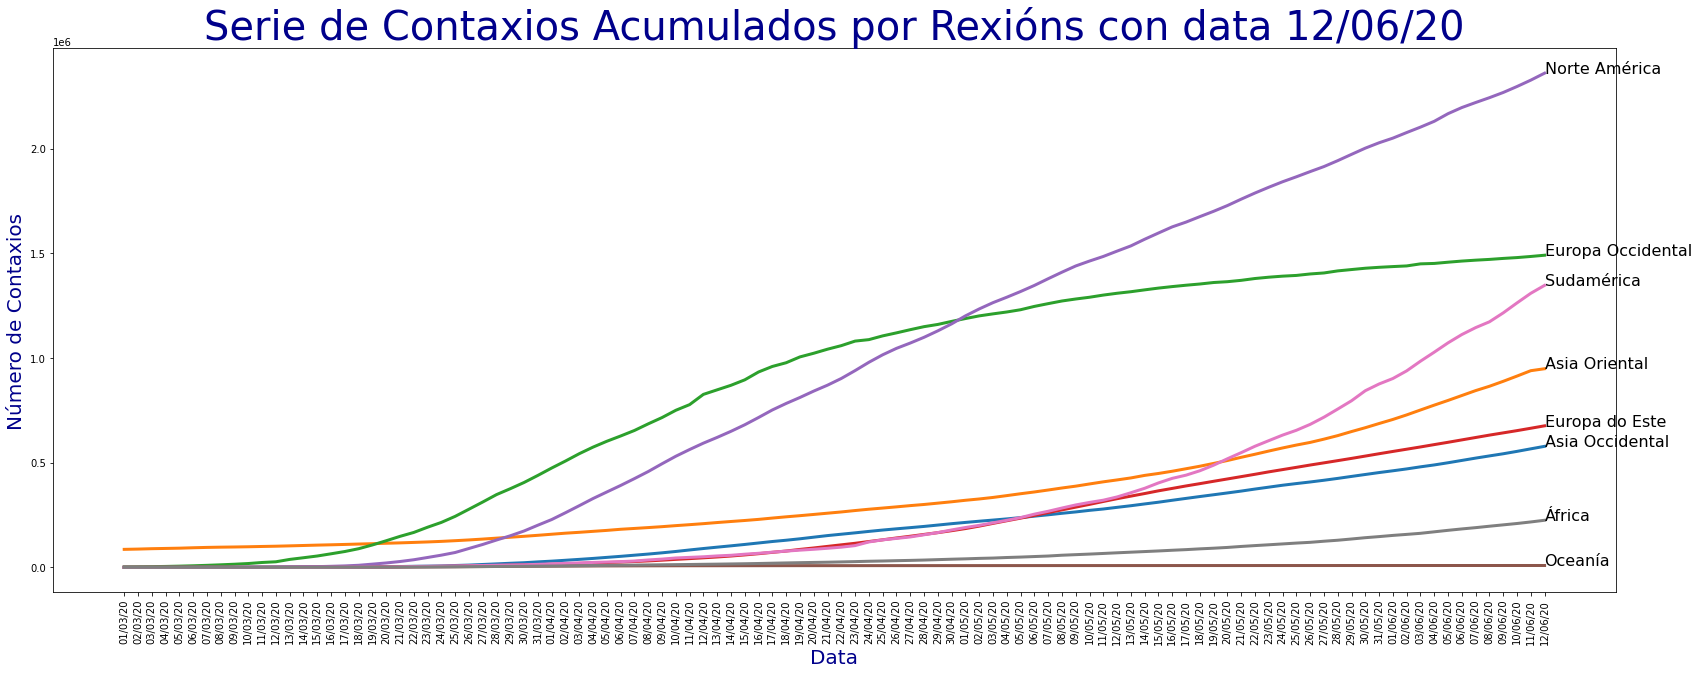

In [93]:
_,ax=plt.subplots(figsize=(28,10))
plt.xticks(rotation=90)
ax.set_title("Serie de Contaxios Acumulados por Rexións con data "+dataHoxe.strftime('%d/%m/%y'),
             color='darkblue',size='40')

for rexion in listaRexions:
    contRexion=contaxiosMelt.loc[((contaxiosMelt["Rexión"]==rexion)&(contaxiosMelt.index>311))]
    ax.plot(contRexion["Día"],contRexion["Valor"],label=rexion,linewidth=3)
    ax.annotate(rexion, (dataHoxe.strftime('%d/%m/%y'),
                         contRexion.loc[contRexion['Día']==dataHoxe.strftime('%d/%m/%y')]['Valor'] ),size=16)
ax.set_xlabel("Data",color='darkblue',size='20')
ax.set_ylabel("Número de Contaxios",color='darkblue',size='20')


### Diagrama de sectores de contaxios hoxe (Rexións)


In [94]:
contaxiosRexion['Dif']=contaxiosRexion[dataHoxe.strftime('%d/%m/%y')]-contaxiosRexion[dataOnte.strftime('%d/%m/%y')]



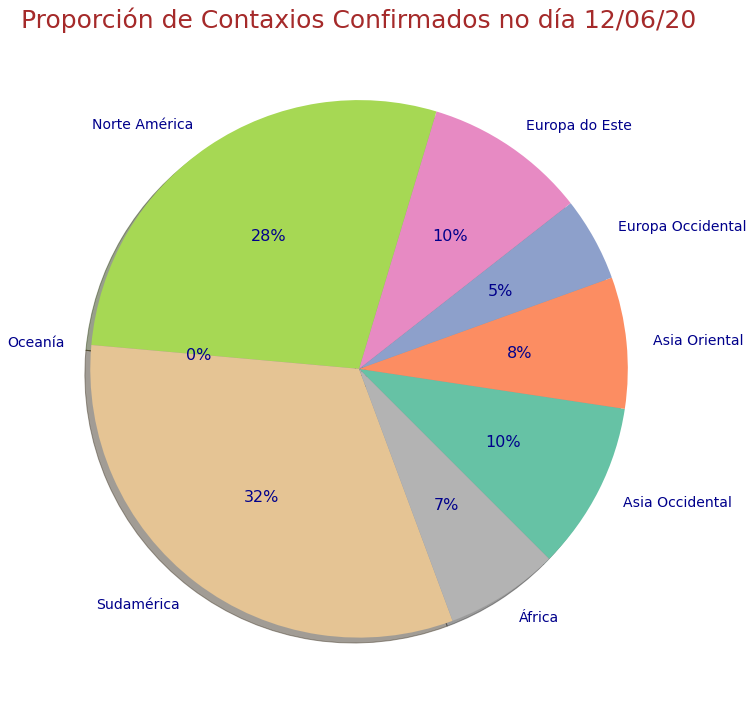

In [95]:
_, ax1 = plt.subplots(figsize=(15,10))
#colorMap=plt.cm.Set2 <- Isto dá problemas en django
colorMap=cm.get_cmap("Set2")
rs=np.linspace(0,1,listaRexions.__len__())
cor=[]
for r in rs:
    cor.append(colors.to_rgba(colorMap(r)))

patches, texts, autotexts = ax1.pie(contaxiosRexion['Dif'], labels=contaxiosRexion['Rexión'], autopct='%1.0f%%',
                                shadow=True,colors=cor,startangle=-45)

for text in texts:
    text.set_color('darkblue')
    text.set_size(14)
for autotext in autotexts:
    autotext.set_color('darkblue')
    autotext.set_size(16)

ax1.set_title("Proporción de Contaxios Confirmados no día "+dataHoxe.strftime('%d/%m/%y'), size=25, color="brown")
plt.tight_layout()
plt.show()

### Gráficos por Rexión

In [96]:
rexion="Asia Oriental"
contaxiosPorRexion=contaxios.loc[contaxios["Rexión"]==rexion]
listaPaises=list(contaxiosPorRexion["País"])
contaxiosPorRexion.drop(["Rexión"],1,inplace=True)
contaxiosMelt=contaxiosPorRexion.melt(id_vars='País',var_name='Día',value_name='Valor')
contaxiosMelt


/home/manu/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,País,Día,Valor
0,Afghanistan,1/22/20,0
1,Bangladesh,1/22/20,0
2,Bhutan,1/22/20,0
3,Brunei,1/22/20,0
4,Burma,1/22/20,0
...,...,...,...
3713,Sri Lanka,6/12/20,1880
3714,Taiwan*,6/12/20,443
3715,Thailand,6/12/20,3129
3716,Timor-Leste,6/12/20,24


Text(0, 0.5, 'Número de Contaxios')

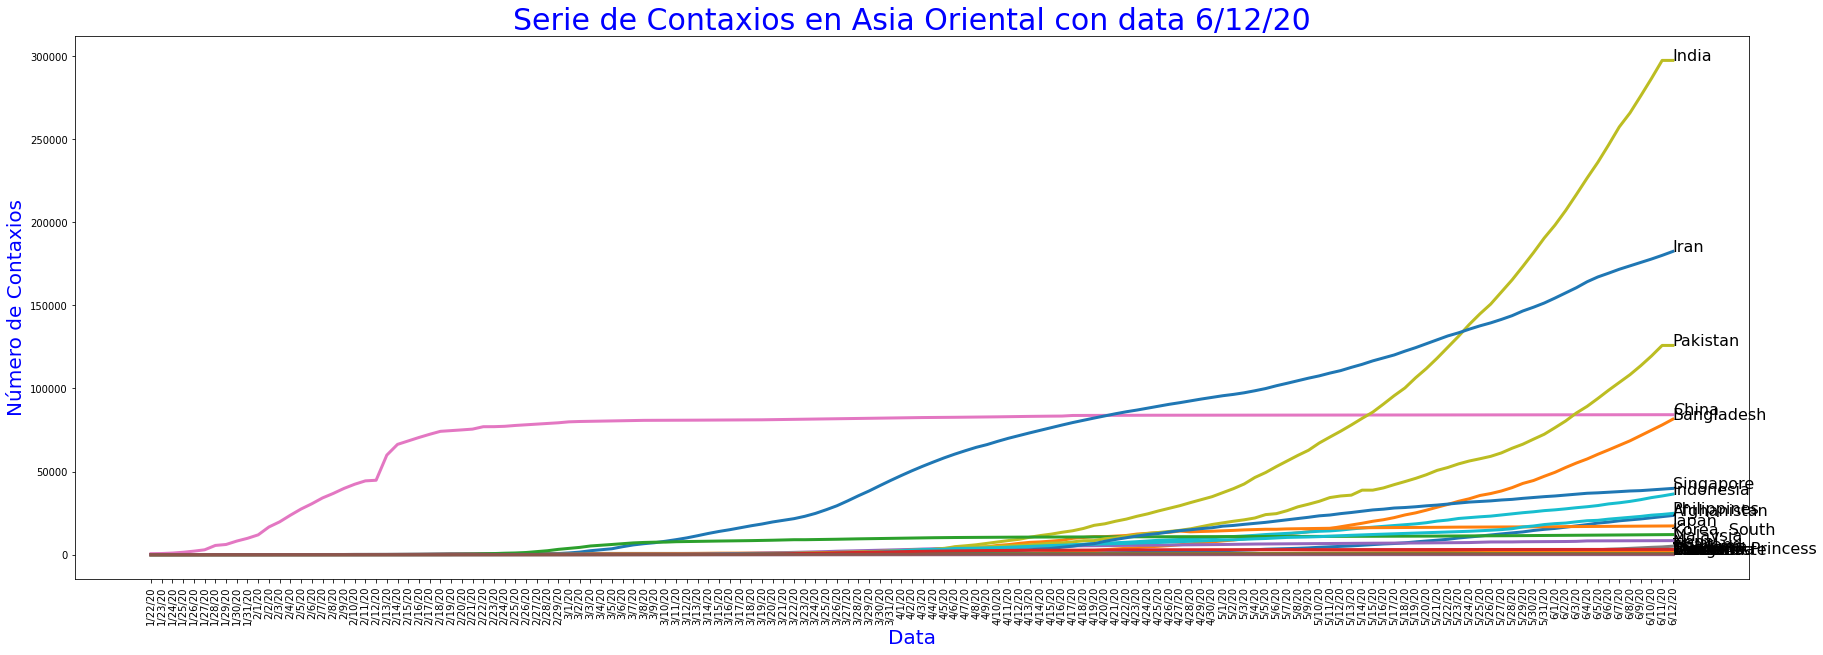

In [97]:
_,ax=plt.subplots(figsize=(30,10))
plt.xticks(rotation=90)
ax.set_title("Serie de Contaxios en "+rexion+" con data "+hoxe,color='blue',size='30')

for pais in listaPaises:
    contPais=contaxiosMelt.loc[(contaxiosMelt["País"]==pais)]
    ax.plot(contPais["Día"],contPais["Valor"],label=pais,linewidth=3)
    ax.annotate(pais, (hoxe,contPais.loc[contPais['Día']==hoxe]['Valor'] ),size=16)
ax.set_xlabel("Data",color='blue',size='20')
ax.set_ylabel("Número de Contaxios",color='blue',size='20')
#ax.legend(loc='upper left', shadow=True, fontsize=16)